# Retrieving news from Event Registry

In [1]:
%matplotlib inline
from eventregistry import *
from eventRegistryHandler import *
from dataHandler import *
import seaborn as sns
import os

#ricardooliveira@copin.ufcg.edu.br
#linha743
er = EventRegistry(apiKey = "9eb5d263-141a-4450-a8e3-5d3c20158798")

#minha chave sem quota: "1f418876-731f-4041-b042-2d6d26d93fc7"


using user provided API key for making requests
Event Registry host: http://eventregistry.org
Text analytics host: http://analytics.eventregistry.org


In [2]:
def get_topic(word):
    for key, values in topics.items():
        if word in values:
            return key
    return None


def file_exists(file_name):
    return os.path.isfile(file_name)

In [3]:
bias_file = pd.read_csv("bias_information/MediaBiasFactCheck/outlets_political_stance")
columns = ['categories','uri','url','source.uri','source.title','title','body','date','dataType','lang','source.location.country.label.eng','source.location.label.eng','sentiment','sim']

FINAL_loc = "title"
FINAL_sim = 0.9
FINAL_n = -1

In [4]:
keywords = {"ita":["Venezuela","Siria"],"por":["Venezuela","Síria",["Lava","Jato"],"Moro"],"deu":["Venezuela","Syrien","Moro"],"eng":["Venezuela","Syria","Moro"]}#,"spa":["Venezuela","Siria"]
topics = {"venezuela":["Venezuela"], "syria":["Síria","Syrien","Syria","Siria"],"lavajato":["Lava_Jato"],"sergiomoro":["Moro"]}

In [5]:
for lang in keywords.keys():
    for key in keywords[lang]:
        print key, lang
        
        topic_name = key
        if type(key) == list:
            topic_name = "_".join(key)
            
        file_name = "EventRegistryData/news_"+topic_name+"_"+lang+".csv"
        exists = file_exists(file_name)
        
        data = None
        last_update = None
        if exists:
            data = pd.read_csv(file_name)
            last_update = data.date.max()
        
        #last_update = "2019-06-09"
        #FINAL_n = 30
        lang_iter = get_news_iterator(er=er, keywords=key, language=lang, loc=FINAL_loc, n_items=FINAL_n, date_start = last_update, outlets_ids=None)
        new_data = retrieve_news_2(lang_iter, columns)
        new_data = add_country_location(new_data)
        new_data = add_bias_information(bias=bias_file, news=new_data, match_similarity=FINAL_sim)
        
        update_data = new_data.append(data)
        update_data["topic"] = get_topic(topic_name)
        update_data.to_csv(file_name, index = False, header=True, encoding="utf-8")
        

Venezuela eng


/home/allan/anaconda2/lib/python2.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


Syria eng
Event Registry exception while executing the request:
Service is currently unavailable
The request will be automatically repeated in 3 seconds...


KeyboardInterrupt: 

In [ ]:
#deu_outlets_ids =["jungefreiheit.de"]#,"faz.net","spiegel.de","taz.de","zeit.de","bild.de","welt.de"
#pt_outlets_ids =["brasil247.com","cartacapital.com.br","oantagonista.com","veja.abril.com.br"]
#eng_outlets_ids =["huffpost.com"],"foxnews.com","breitbart.com","washingtonpost.com","reuters.com"]

## Dataset Description

### Joining tables

In [6]:
import glob

path = r'EventRegistryData/'
all_files = glob.glob(path + "/*.csv")
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None)
    li.append(df)

news = pd.concat(li, axis=0, ignore_index=True)
news["subject"] = news.title.apply(lambda x: "venezuela" if "venezuela" in x.lower() else "syria")

### Dataset Overview

In [7]:
print "min: "+news.date.min()
print "max: "+news.date.max()
print len(news.date.unique())
#print news.date.value_counts()

min: 2019-03-10
max: 2019-08-26
165


In [8]:
news.lang.value_counts()

eng    25176
spa     6009
por     5742
deu     2922
ita      479
Name: lang, dtype: int64

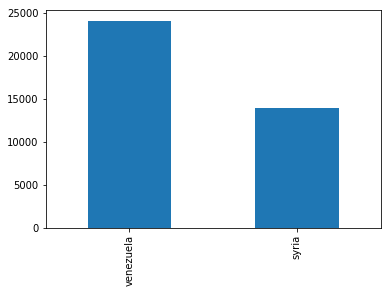

In [4]:
news.subject.value_counts().plot(kind="bar")

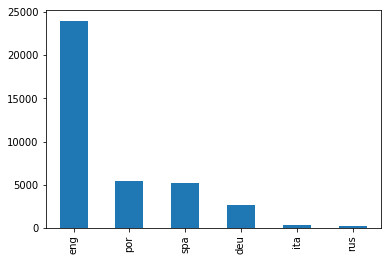

In [9]:
news.lang.value_counts().plot(kind="bar")

In [10]:
len(news["country_location"].unique())

129

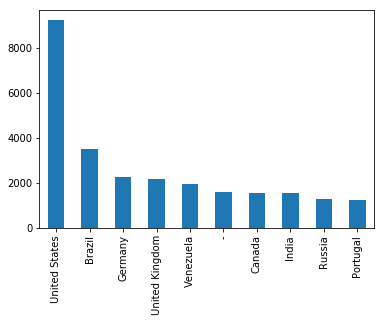

In [11]:
news.country_location.value_counts()[0:10].plot(use_index=True, kind="bar")

In [12]:
len(news["source.title"].unique())

2343

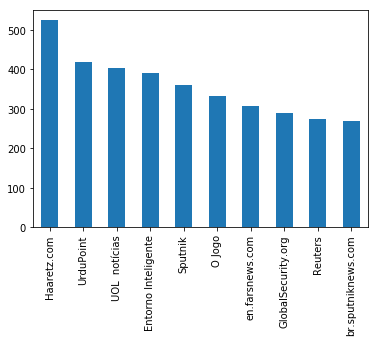

In [13]:
news["source.title"].value_counts()[0:10].plot(kind="bar")

### USA, UK, Canada, Germany and Brazil

In [18]:
isin = news.country_location.isin(["United States","Brazil","Germany","United Kingdom","Canada","Russia","Portugal","Spain","Venezuela","Colombia","Italy"])
news_countries = news[isin]

In [19]:
news_countries.shape

(24636, 18)

Number of news by country:

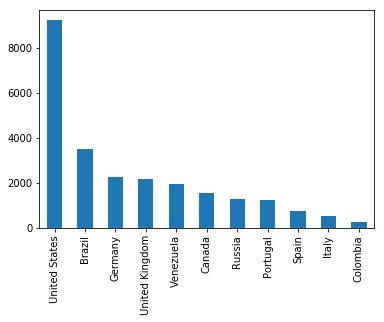

In [20]:
news_countries.country_location.value_counts().plot(kind="bar")

### Do the news subjectivities rates changes according to the countries news media?

Are the news' subjectivities, over a predefined subject, of Brazilian, Germany and American news outlets significantly different?

Number of news by country:

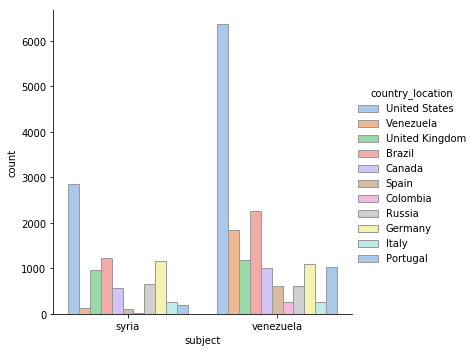

In [21]:
sns.catplot(x="subject", hue="country_location", kind="count", palette="pastel", edgecolor=".6", data=news_countries)

Number of news by language and country:

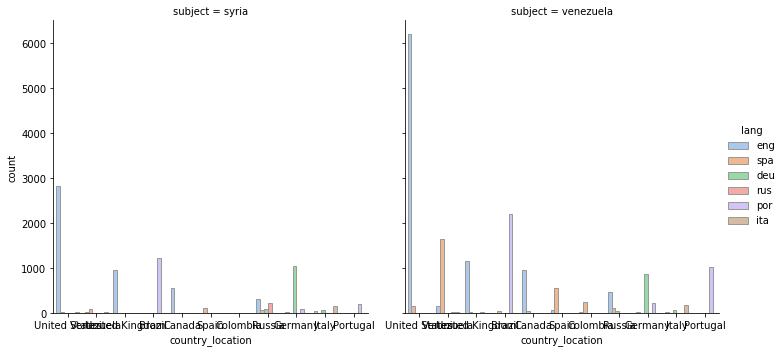

In [22]:
sns.catplot(x="country_location", hue="lang", col="subject", kind="count", palette="pastel", edgecolor=".6", data=news_countries)

### Does the news outlets political slant have an influence on the subjectivity rates?

News by political orientation in all countries:

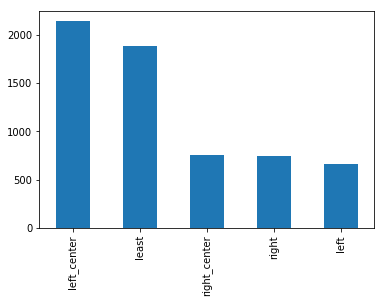

In [23]:
news.stance.value_counts().plot(kind="bar")

News by political orientation in USA, UK, Canada, Germany and Brazil:

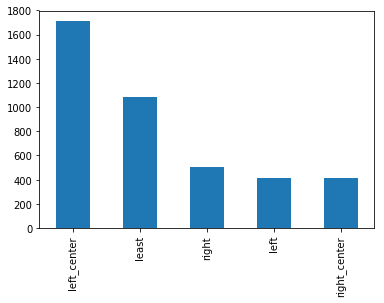

In [24]:
news_countries.stance.value_counts().plot(kind="bar")

Political slant by country and subject:

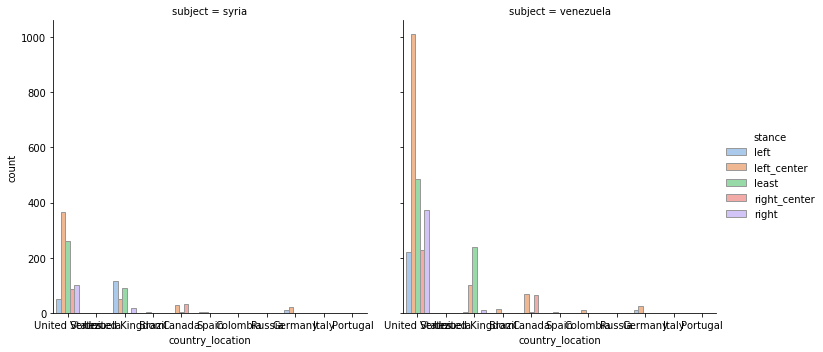

In [25]:
sns.catplot(x="country_location", hue="stance", col="subject", kind="count", palette="pastel", edgecolor=".6", data=news_countries)

Encontrar um contexto em que a cobertura da guerra da siria nao seja significantemente menor que a crise da venezuela